In [79]:
include("../src/include_file.jl")

extendInitialDataToLinear (generic function with 1 method)

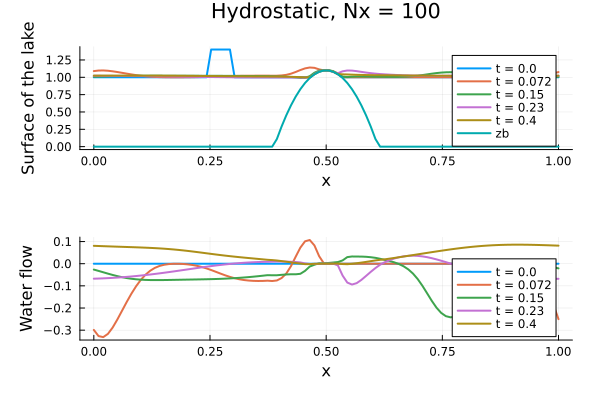

nothing

In [81]:
# Domain definition with a bump topography

topography = bump_zb(width=0.05, height=1.1)
Nx, t0, Tf = 100, 0, 0.4
CFL_factor = 0.5
domain = createUnitInterval(Nx, t0, Tf)
eq = SaintVenant(topography, 1e-10)
addSource!(eq.source, domain)

method = createHydrostatic(CFL_factor, Rusanov)

#v0 = v0_lake_at_rest(domain.x, source_term)
v0 = v0_lake_at_rest_perturbated(domain.x, topography, xleft=0.25, xright=0.3)

# plot(domain.x, domain.sourceVec, label="Topography")
# plot!(domain.x, domain.sourceVec .+ v0[:,1], label="Water surface")
# xlabel!("x")
# ylabel!("z")

solSV = fv_solve(domain, v0, eq, method)
nb_plots = 5
display(plot_fv_sol(solSV, solSV.equation; nb_plots=nb_plots, plotMode=DisplayMode()))

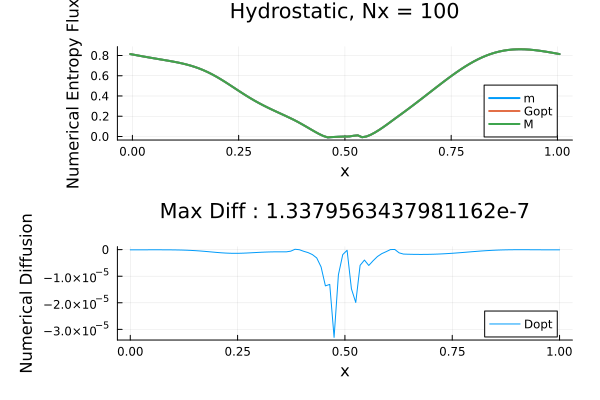

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     2.169638e-14

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1914

Maximal diffusion value : 1.3379563437981162e-7


In [82]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), g_tol=1e-8)
display(plot_solution(solEnt))

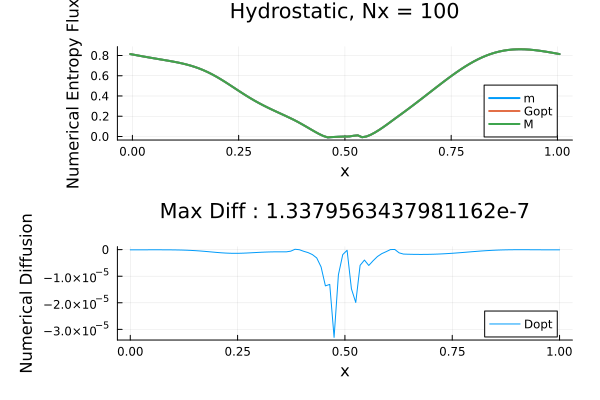

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     2.169638e-14

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-10

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    5953
    f(x) calls:    8592

Maximal diffusion value : 1.3379563437981162e-7


In [87]:
# Does the Max diff disminishes when we low down the tolerance ?

solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), g_tol=1e-10, iterations=10000)
display(plot_solution(solEnt))

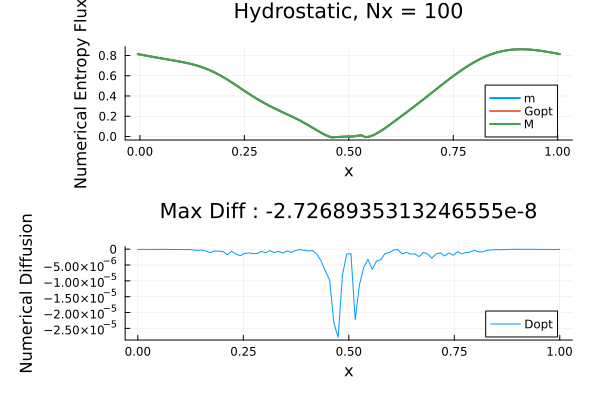

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     0.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-15

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    8470
    f(x) calls:    12486

Maximal diffusion value : -2.7268935313246555e-8


In [86]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=meanK(1,1), g_tol=1e-15, iterations=10000)
display(plot_solution(solEnt))

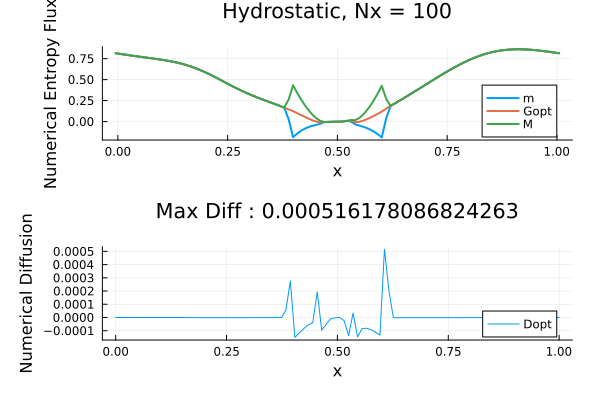

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.245477e-07

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    1896

Maximal diffusion value : 0.000516178086824263


In [88]:
# With a definition of K not preserving the lake at rest
# The optimization process still finds an entropic solution but requires a higher number of iterations

solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=maxK())
display(plot_solution(solEnt))

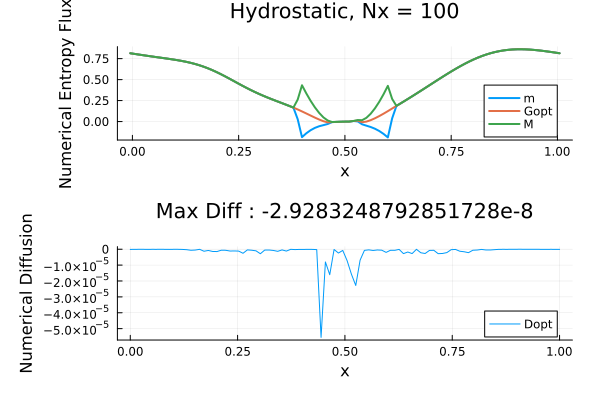

nothing

sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:294 =#
                J(gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: success

 * Candidate solution
    Final objective value:     0.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-15

 * Work counters
    Seconds run:   4  (vs limit Inf)
    Iterations:    11030
    f(x) calls:    15374

Maximal diffusion value : -2.9283248792851728e-8


In [90]:
solEnt = optimize_for_entropy(v0, domain, eq, method, modifiedDataType=maxK(), g_tol=1e-15, iterations=100000)
display(plot_solution(solEnt))